In [1]:
import uproot4
import numpy as np
import awkward1 as ak

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import matplotlib.gridspec as gridspec

Configuration

In [2]:
nEvts = 10000
etmax = np.empty(nEvts)
ettot = np.empty(nEvts)
add = np.empty(nEvts)
mult= np.empty(nEvts)
threshold = 6
signalMax = 256
plot_voiesOff = np.empty(nEvts)
plot_voiesOff_side = np.empty(nEvts)
plot_voiesOff_up = np.empty(nEvts)
plot_voiesOff_corner = np.empty(nEvts)
for ievt in range(nEvts):
    if (ievt % 2) == 0 :
        signalMax = 256
    else :
        signalMax = 100    
    N_maxVoiesOFF = 32 
    # nombre de voies OFF aleatoire
    NCH_Off = np.random.randint(0, N_maxVoiesOFF, 1)
    # nombre de voies OFF side aleatoire .. on doit rester avec la meme proba que la carte centrale
    NCH_Off_side = np.random.randint(0, N_maxVoiesOFF, 1)
    # nombre de voies OFF up aleatoire
    NCH_Off_up = np.random.randint(0, N_maxVoiesOFF, 1)
    # nombre de voies OFF corner aleatoire
    NCH_Off_corner = np.random.randint(0, N_maxVoiesOFF, 1)
   
    #generation des signaux 0 a 31 dans la carte et on stocke dans chs 
    chs = np.empty(32)
    #Tirage de NCH_Off aleatoirement parmi les 32 voies 
    # attention parfois il y en a des identiques ...   
    voiesOff = np.random.randint(0, 32, NCH_Off)
    voiesOff.sort()
    voiesOff_side = np.random.randint(0, 32, NCH_Off_side)
    voiesOff_side.sort()
    voiesOff_up = np.random.randint(0, 32, NCH_Off_up)
    voiesOff_up.sort()
    voiesOff_corner = np.random.randint(0, 32, NCH_Off_corner)
    voiesOff_corner.sort()
 #   print('NCH_Off',NCH_Off)
 #   print('Voies OFF',voiesOff)
 #   print('NCH_Off_corner',NCH_Off_corner)
 #   print('Voies OFF_corner',voiesOff_corner)
    i = 0
    while i < 32:
        chs[i] = np.random.randint(0, signalMax, 1)
        for j in voiesOff :
            if i == j:
                chs[i] = np.random.normal(0, 3, 1)
                break
        i = i +1
    #generation de 0 a 7 : side 
    chs_side = np.empty(8)
    i = 0
    while i < 8:
        chs_side[i] = np.random.randint(0, signalMax, 1)
        for j in voiesOff_side :
            if i == j:
                chs_side[i] = np.random.normal(0, 3, 1)
                break
        i = i + 1   
 
    #generation de 0 a 3 top 
    chs_up = np.empty(4)
    i = 0
    while i < 4:
        chs_up[i] = np.random.randint(0, signalMax, 1)
        for j in voiesOff_up :
            if i == j:
                chs_up[i] = np.random.normal(0, 3, 1)
                break
        i = i + 1 
    #generation 0 corner
    chs_corner=np.empty(1) 
    chs_corner[0] = np.random.randint(0, signalMax, 1)
    if NCH_Off_corner > 0 and voiesOff_corner[0] == 0 :
        chs_corner[0] = np.random.normal(0, 3, 1)
    chs_A = chs
    chs_B = chs
    chs_B = np.delete(chs_B,np.s_[0:29:4],axis=0)
    chs_B = np.insert(chs_B,[3,6,9,12,15,18,21,24],chs_side,axis=0)
 #   print(np.reshape(chs_B,(-1,4)))
    chs_C = chs
    chs_C = np.delete(chs_C,np.s_[0:4],axis=0)
    chs_C = np.append(chs_C,chs_up,axis=0)
    #print(np.reshape(chs_C,(-1,4)))
    chs_D = chs_B
    chs_D = np.delete(chs_D,np.s_[0:4],axis=0)
    chs_D = np.append(chs_D,chs_up[1:4],axis=0)
    chs_D = np.append(chs_D,chs_corner,axis=0)
 #   print(np.reshape(chs_D,(-1,4)))
    cands = chs_A+chs_B+chs_C+chs_D
    etmax[ievt] = min(1024,np.max(cands,axis=0))
    add[ievt]   = np.argmax(cands,axis=0)
    ettot[ievt] = min(2047,np.sum(chs,axis=0))
    mult[ievt] = np.count_nonzero( chs >= threshold , axis = 0 )


Un cluster est: <br>
| A B | <br>
| C D |

Text(0.5,1,'LLT add')

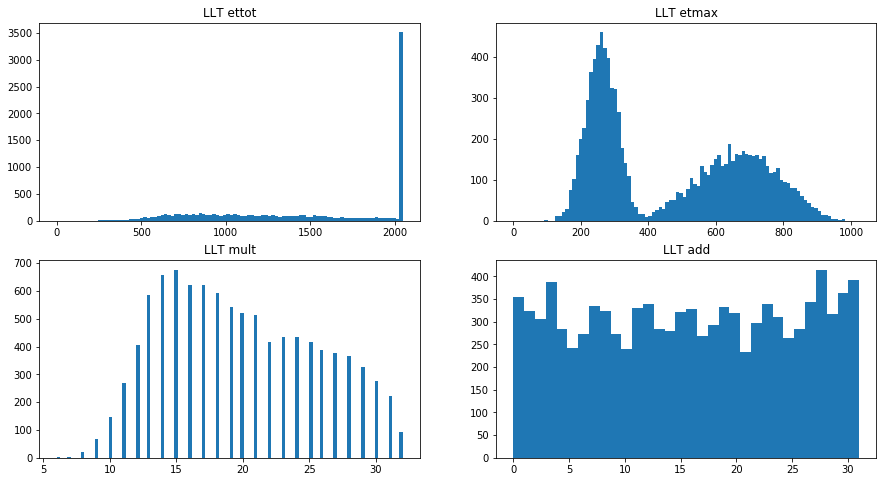

In [3]:
a,((plt1,plt2),(plt3,plt4))=plt.subplots(2,2,figsize=(15,8))
plt1.hist(ettot,bins=100,range=(0,2048))
plt1.set_title('LLT ettot')
plt2.hist(etmax,bins=100,range=(0,1024))
plt2.set_title('LLT etmax')
plt3.hist(mult,100)
plt3.set_title('LLT mult')
plt4.hist(add,32)
plt4.set_title('LLT add')